In [30]:
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns   # for enhanced visualizations


In [31]:

Game_sales = pd.read_csv(r'C:\Users\marlo\OneDrive\Desktop\Coding\video_games_sales.csv')
Game_sales.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


*Cleaning Data*

In [32]:
# Checking for missing values
Game_sales.isna().sum()



rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [33]:
# Dropping rows with missing values(1.8%` of the data)
Game_sales = Game_sales.dropna(axis=0)
len(Game_sales)


16291

In [34]:

# drop unnecessary columns
Game_sales.drop(['name', 'rank', 'publisher'], axis=1, inplace=True)
Game_sales.head()


,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


*Pre-processing*

In [35]:
# strip whitespace from columns names
Game_sales.columns = Game_sales.columns.str.strip()


In [36]:
# Define platform mapping to simplify categories
platform_mapping = {
    'PS2': 'Sony',
    'PS3': 'Sony',
    'PS4': 'Sony',
    'PS': 'Sony',
    'PSP': 'Sony',
    'PSV': 'Sony',
    'X360': 'Microsoft',
    'XOne': 'Microsoft',
    'XSB': 'Microsoft',
    'Wii': 'Nintendo',
    'WiiU': 'Nintendo',
    'Switch': 'Nintendo',
    'GB': 'Nintendo',
    'GBA': 'Nintendo',
    'DS': 'Nintendo',
    '3DS': 'Nintendo',
    'NES': 'Nintendo', 
    'SNES': 'Nintendo', 
    'N64': 'Nintendo', 
    'GC': 'Nintendo',
    'Gen': 'Sega',
    'DC': 'Sega',
    'SAT': 'Sega',
    'GG': 'Sega',
    'SCD': 'Sega',
    '2600': 'Atari',
    '3DO': 'Other',
    'TG16': 'Other',
    'PCFX': 'Other',
    'NG': 'Other',
    'WS': 'Other',
    'PC': 'PC'
    }  

# Apply platform mapping
Game_sales['platform'] = Game_sales['platform'].map(platform_mapping)
Game_sales.head()


,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Nintendo,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,Nintendo,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,Nintendo,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,Nintendo,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,Nintendo,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


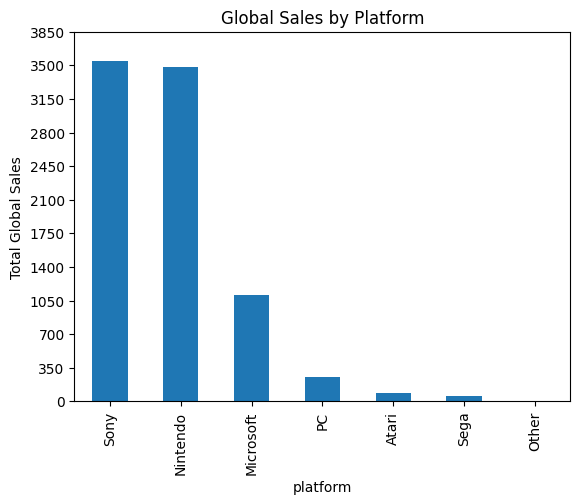

In [37]:
# Aggregate global sales by platform and plot as a bar chart
platform_sales = Game_sales.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar')
plt.ylabel('Total Global Sales')
plt.title('Global Sales by Platform')
plt.yticks(np.arange(0, 4000, 350))
plt.show()


<Axes: xlabel='year', ylabel='global_sales'>

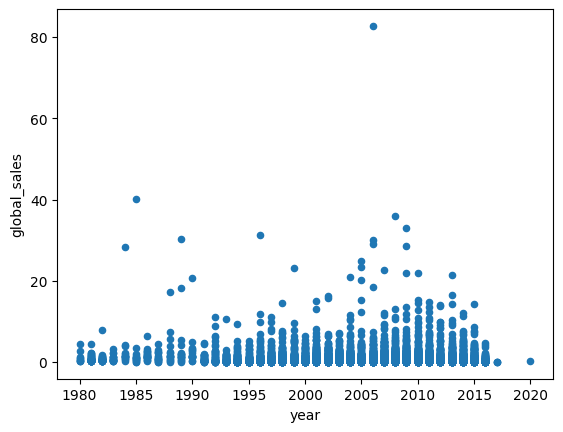

In [38]:
# Scatter plot of global sales over the years
Game_sales.plot(x='year', y='global_sales', kind='scatter')

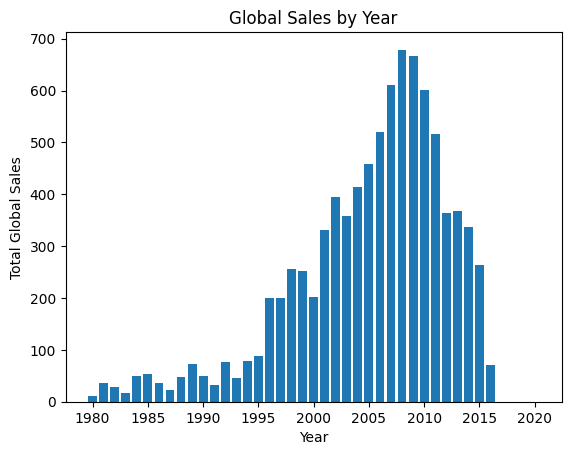

In [39]:
# Group the Game_sales DataFrame by year, sums global_sales for each year, then sorts by the summed sales (highest first).
Global_Sales_ByYear = Game_sales.groupby('year')['global_sales'].sum().sort_values(ascending=False)
plt.bar(Global_Sales_ByYear.index, Global_Sales_ByYear.values) # x values are the years (the index of the Series), y values are the summed sales
plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.title('Global Sales by Year')
plt.show()


<Axes: xlabel='year'>

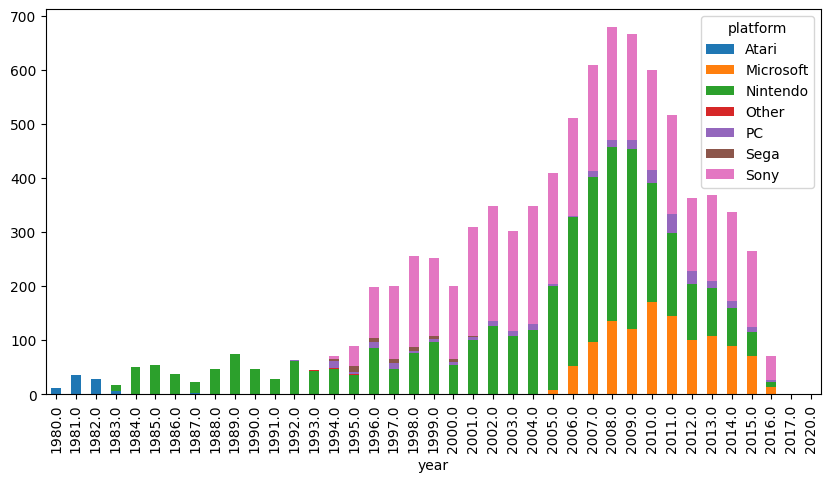

In [40]:
# Sales per platform per years as a stacked bar chart
by = (Game_sales
      .dropna(subset=['year','platform','global_sales']) # drop rows with missing values in these columns
      .groupby(['year','platform'])['global_sales'].sum() # group by year and platform, summing global_sales
      .unstack(fill_value=0) # pivot the platform level to columns
      .sort_index())     # chronologically sort by year

by.plot(kind='bar', stacked=True, figsize=(10,5))


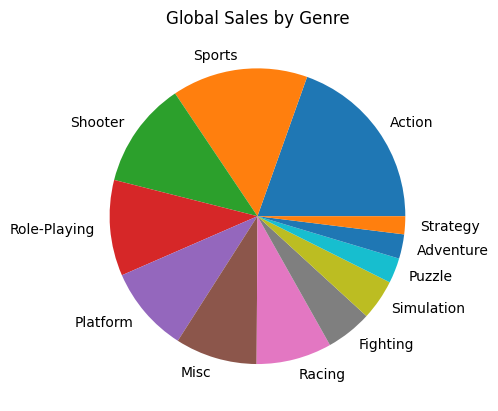

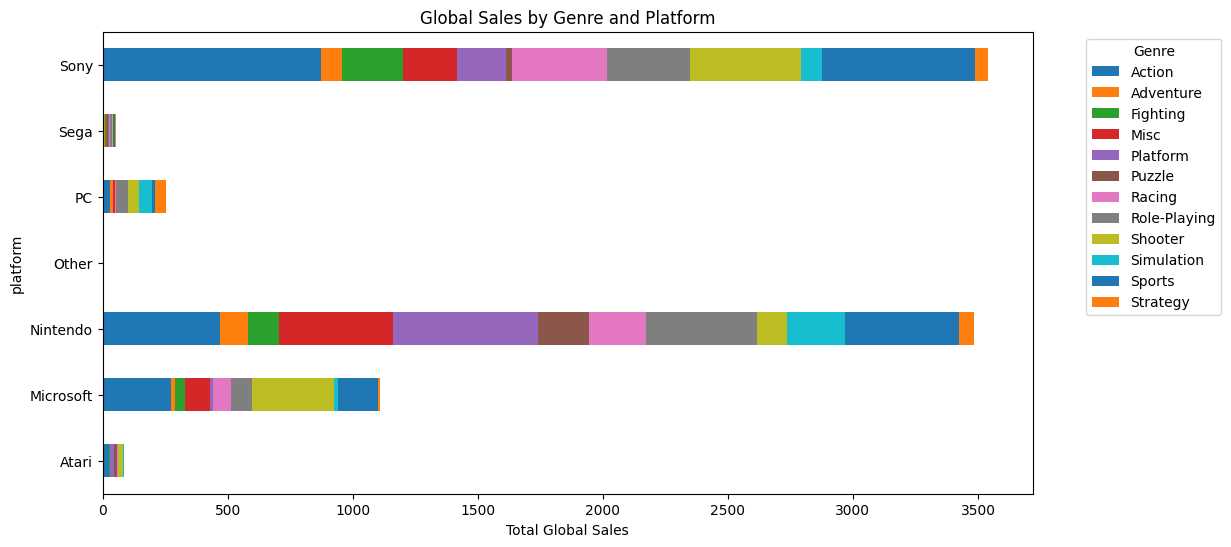

In [41]:
# Favorite genre by sales
genre_sales = Game_sales.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='pie')
plt.title('Global Sales by Genre')
plt.ylabel('')
plt.show()

# genre by platform
genre_platform_sales = Game_sales.groupby(['platform', 'genre'])['global_sales'].sum().unstack(fill_value=0)
genre_platform_sales.plot(kind='barh', stacked=True, figsize=(12,6))
plt.xlabel('Total Global Sales')
plt.title('Global Sales by Genre and Platform')
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show() 



